In [1]:
import os
import json
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

In [ ]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

pathtoCOCO = ROOT_DIR + '/data/Chaos_D/label/Chaos_Co_COCO.json'
pathtoImage = ROOT_DIR + "/data/Chaos_Co/image/E6ESDRKLIN01_GalileoSSI_E_reproj.tif"

In [4]:
# Load COCO JSON annotation file and corresponding image
coco = COCO(pathtoCOCO)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


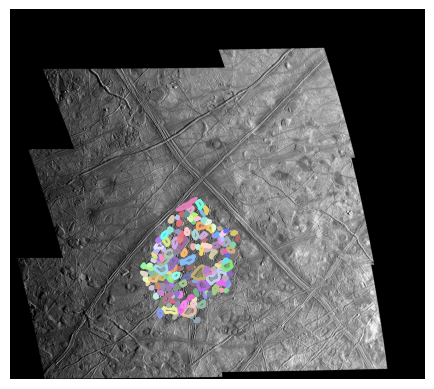

In [5]:
# plot annotations overlayed on image
image = cv2.imread(pathtoImage, 0)
plt.imshow(image, cmap='gray')
plt.axis('off')

image_id = 1
img = coco.imgs[image_id]
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

(-0.5, 2435.5, 2169.5, -0.5)

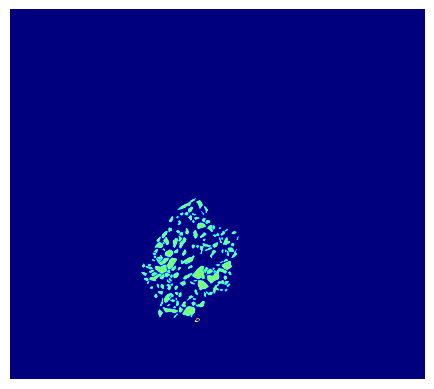

In [6]:
# Plot mask
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask, cmap='jet')
plt.axis('off')
# Save mask only if desired